In [24]:
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

In [25]:
RESULTS_BASE_PATH = 'RESULTS'

NODES = [(5, 8), (8, 5), (5, 12), (8, 12)]

plt.rcParams['figure.figsize'] = [13, 10]
# FAILUER_TIME = 16000

In [26]:
def load_results(exp_name):
    exp_path = os.path.join(RESULTS_BASE_PATH, exp_name)
    y_test = np.load(os.path.join(exp_path, "true.npy"))
    y_predicted = np.load(os.path.join(exp_path, "predicted.npy"))

    return (y_test, y_predicted)

def absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.abs((y_true - y_pred) / y_true) * 100

def calculate_99_mean_absolute_percentage_error(y_true, y_pred): 
    error = absolute_percentage_error(y_true, y_pred)

    to_take = int(len(y_true) * 0.99)
    sorted = np.sort(error)

    error_99 = sorted[:to_take]

    print(f'99% MAPE: {np.mean(error_99)}')

def plot_prediction(y_test, y_predicted, title):
    x_axis = range(len(y_test))
    # plt.title(f'Prediction - {title}')
    plt.plot(x_axis, y_test, label='real', linewidth=1)
    plt.plot(x_axis, y_predicted, label='predicted', linewidth=1)
    plt.legend()
    plt.savefig(f'LSTM_{title}.png')
    plt.show()

def plot_percentage_error(y_test, y_predicted, title):
    x_axis = range(len(y_test))
    plt.title(f'Error - {title}')
    error = absolute_percentage_error(y_test, y_predicted)
    plt.plot(x_axis, error, label='error', linewidth=1)
    plt.show()

def analyze_experiment_singlestep(exp_name, node, subsection=(0, 100)):
    y_test, y_predicted = load_results(exp_name)
    y_test = y_test.reshape(-1)
    y_predicted = y_predicted.reshape(-1)


    calculate_99_mean_absolute_percentage_error(y_test, y_predicted)
    print(f'NODE {node} - TOTAL MAPE: ', mean_absolute_percentage_error(y_test, y_predicted))

    y_test = y_test[subsection[0] : subsection[1]]
    y_predicted = y_predicted[subsection[0] : subsection[1]]

    print(f'NODE {node} - SECTION MAPE: ', mean_absolute_percentage_error(y_test, y_predicted))

    plot_prediction(y_test, y_predicted, node)
    plot_percentage_error(y_test, y_predicted, node)

def analyze_experiment_multistep(exp_name, node, out_samples, subsection=(0, 100)):
    y_test, y_predicted = load_results(exp_name)


    for i in range(out_samples):
        y_test_i = y_test[:,i]
        y_predicted_i = y_predicted[:,i]


        calculate_99_mean_absolute_percentage_error(y_test_i, y_predicted_i)
        print(f'NODE {node} - TOTAL MAPE: ', mean_absolute_percentage_error(y_test_i, y_predicted_i))

        y_test_i = y_test_i[subsection[0] : subsection[1]]
        y_predicted_i = y_predicted_i[subsection[0] : subsection[1]]

        print(f'NODE {node} - SECTION MAPE: ', mean_absolute_percentage_error(y_test_i, y_predicted_i))

        plot_prediction(y_test_i, y_predicted_i, f'{node}_{i+1}')
        plot_percentage_error(y_test_i, y_predicted_i, node)

def analyze_all_experiments_singlestep(exp_name, subsection=(0, 100)):
    for n_from, n_to in NODES:
        analyze_experiment_singlestep(f'{exp_name}___{n_from}to{n_to}', f'{n_from} to {n_to}', subsection)

def analyze_all_experiments_multistep(exp_name, out_samples, subsection=(0, 100)):
    for n_from, n_to in NODES:
        analyze_experiment_multistep(f'{exp_name}___{n_from}to{n_to}', f'{n_from} to {n_to}', out_samples, subsection)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


99% MAPE: 18.333107862970813
NODE 5 to 8 - TOTAL MAPE:  0.5421273497229768
NODE 5 to 8 - SECTION MAPE:  0.1851764805147774


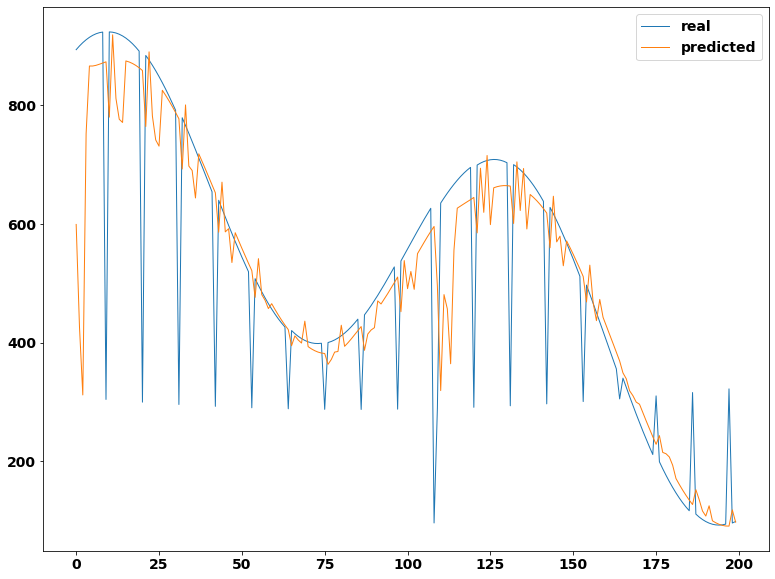

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


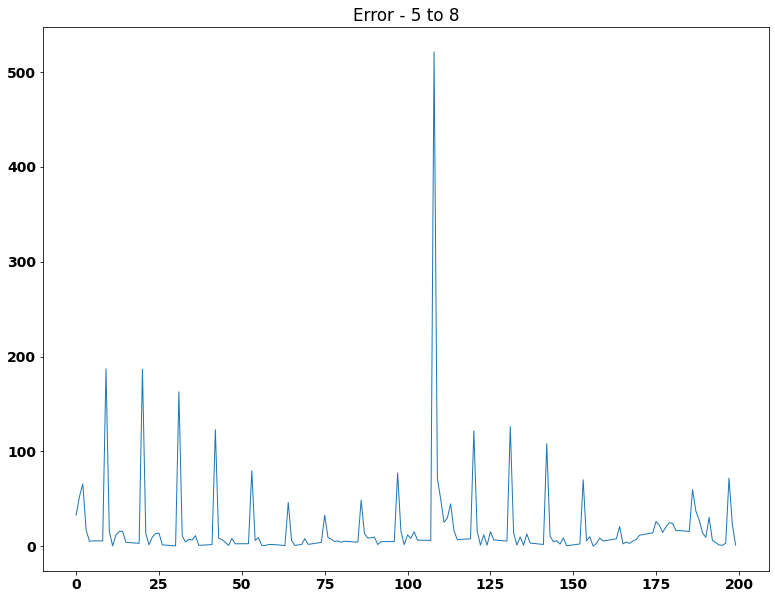

99% MAPE: 21.435527735606122
NODE 5 to 8 - TOTAL MAPE:  0.6475768288084699
NODE 5 to 8 - SECTION MAPE:  0.19637733337510255


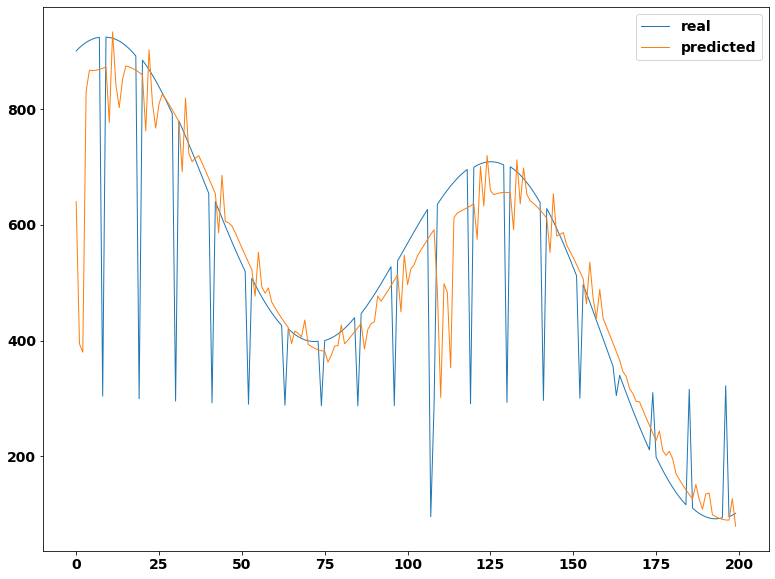

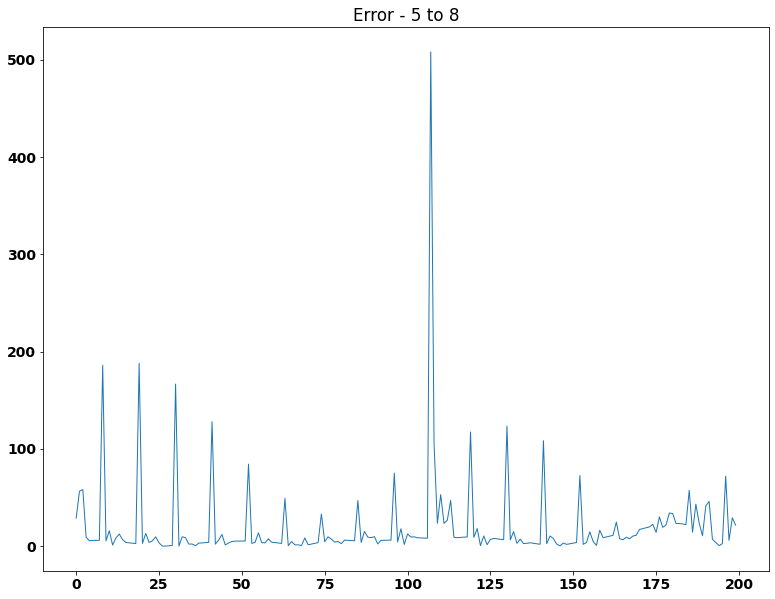

99% MAPE: 22.07825973684771
NODE 5 to 8 - TOTAL MAPE:  0.5469366894650146
NODE 5 to 8 - SECTION MAPE:  0.21259524076803313


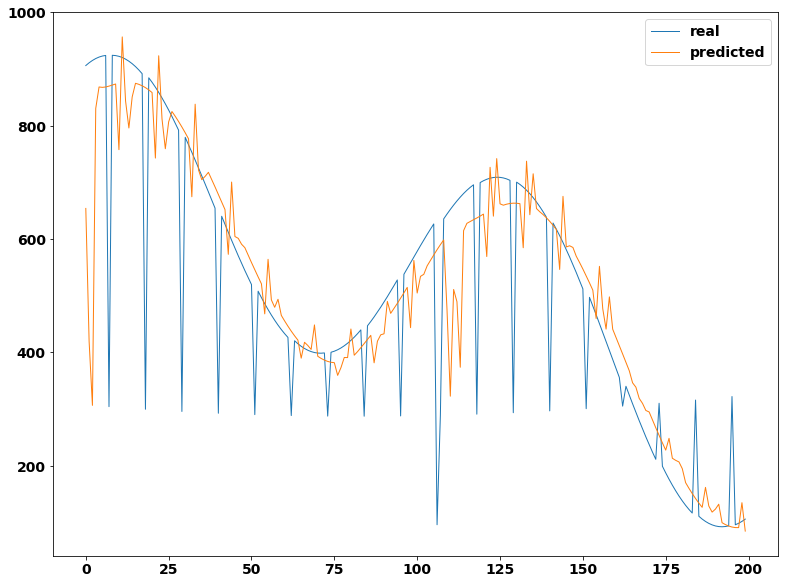

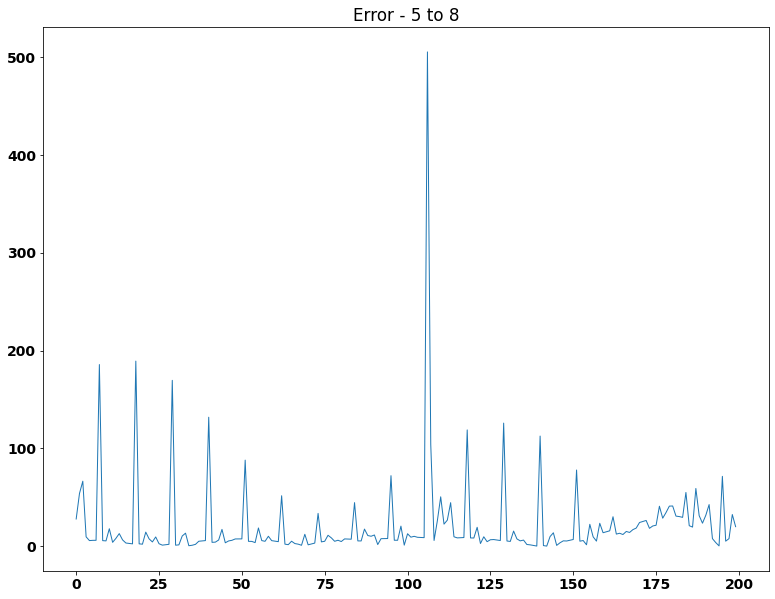

99% MAPE: 19.724938228022342
NODE 8 to 5 - TOTAL MAPE:  0.5187373077240267
NODE 8 to 5 - SECTION MAPE:  0.08618985346506668


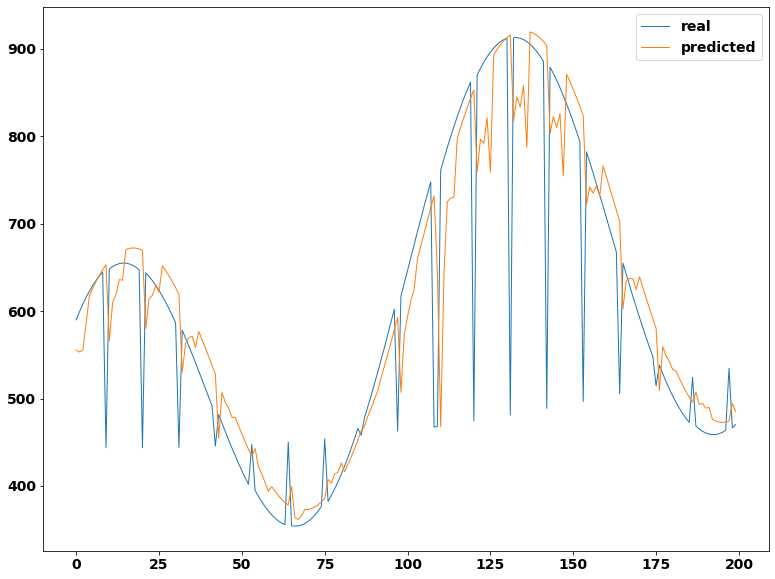

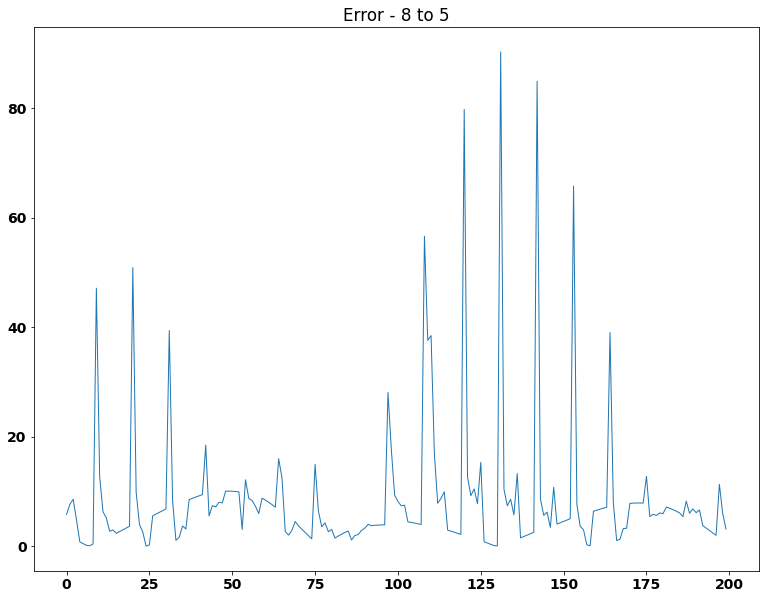

99% MAPE: 20.260811474359443
NODE 8 to 5 - TOTAL MAPE:  0.4984559371638395
NODE 8 to 5 - SECTION MAPE:  0.09237330686255653


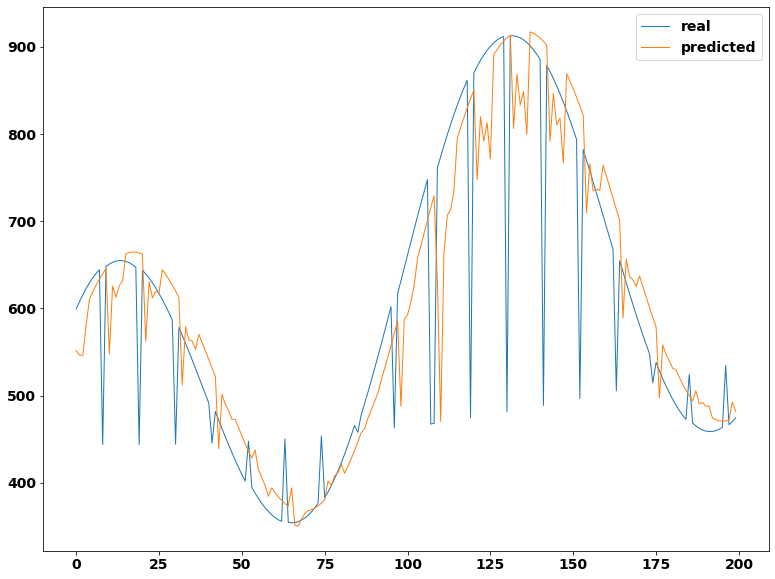

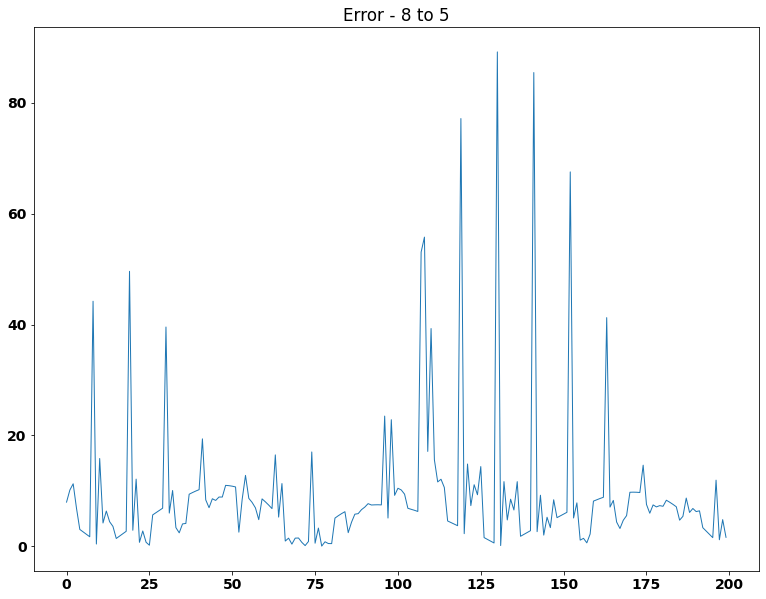

99% MAPE: 21.686182177212178
NODE 8 to 5 - TOTAL MAPE:  0.5162073978154492
NODE 8 to 5 - SECTION MAPE:  0.09883293682732262


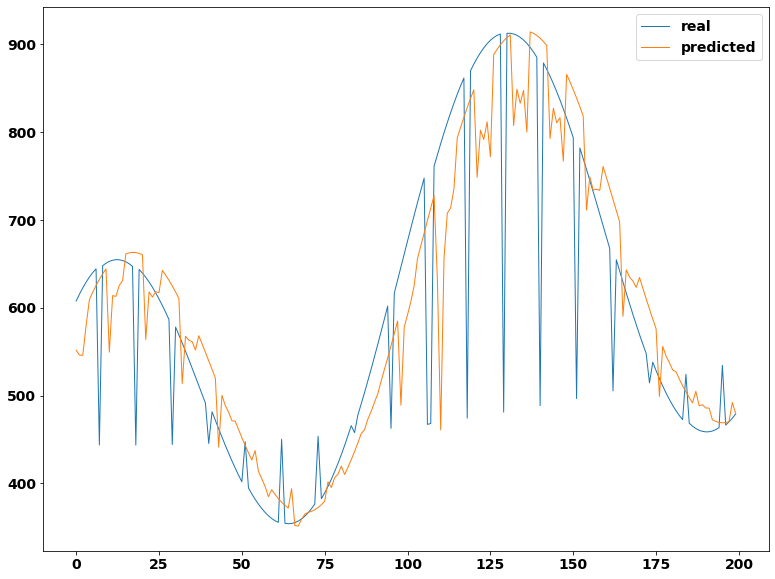

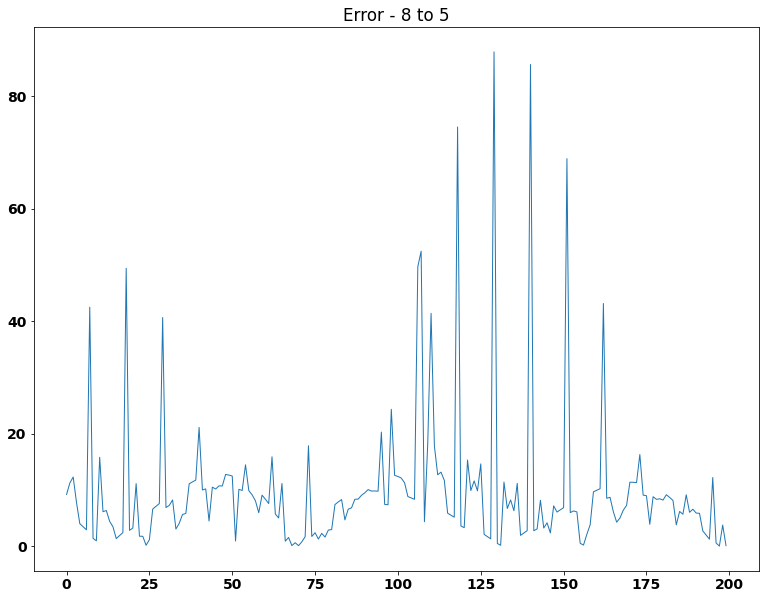

99% MAPE: 45.90970469390803
NODE 5 to 12 - TOTAL MAPE:  1.5740821729560173
NODE 5 to 12 - SECTION MAPE:  0.33192932984577284


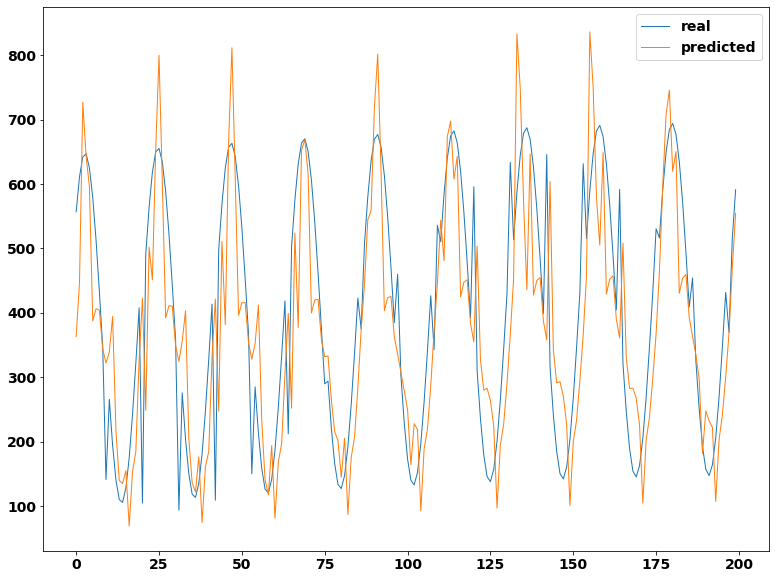

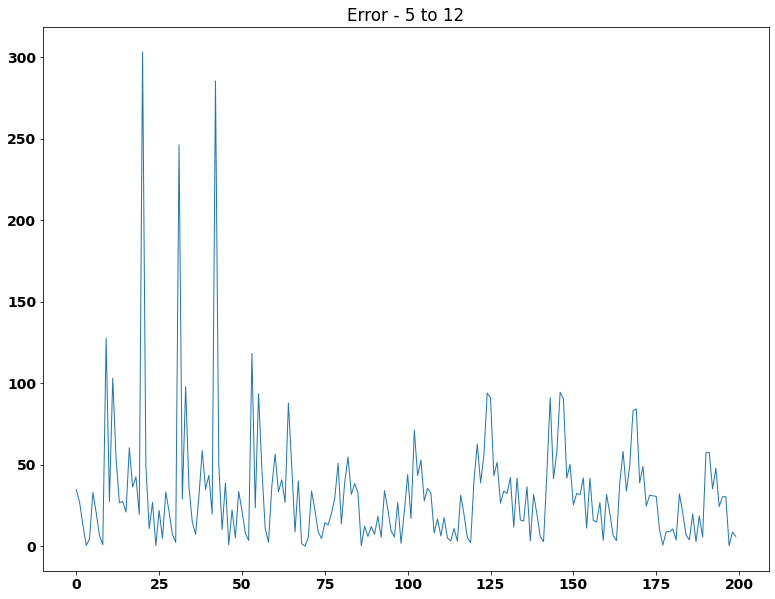

99% MAPE: 56.88734958321873
NODE 5 to 12 - TOTAL MAPE:  1.9224310485690619
NODE 5 to 12 - SECTION MAPE:  0.3504016601610124


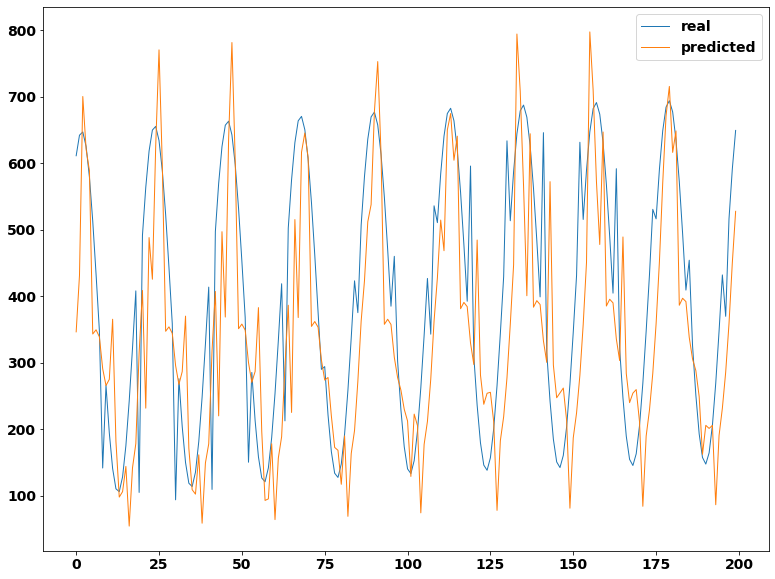

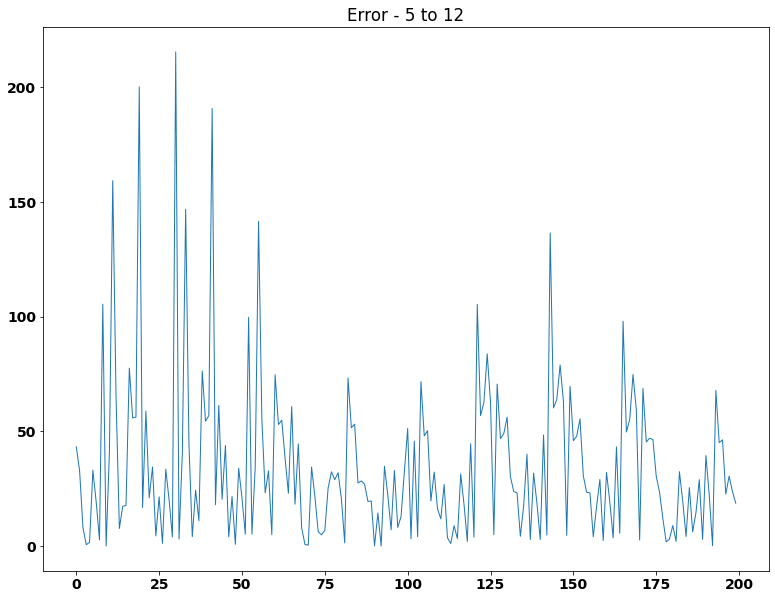

99% MAPE: 69.29042423752404
NODE 5 to 12 - TOTAL MAPE:  2.343309602966042
NODE 5 to 12 - SECTION MAPE:  0.3843791775622134


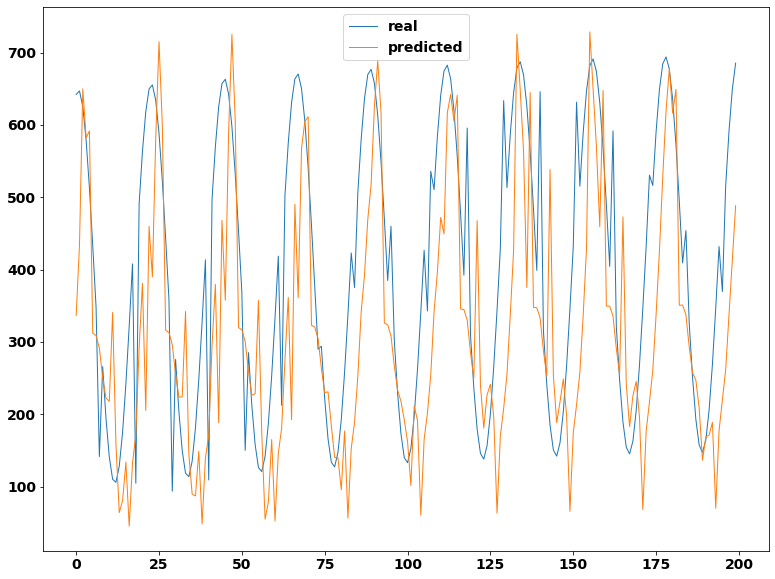

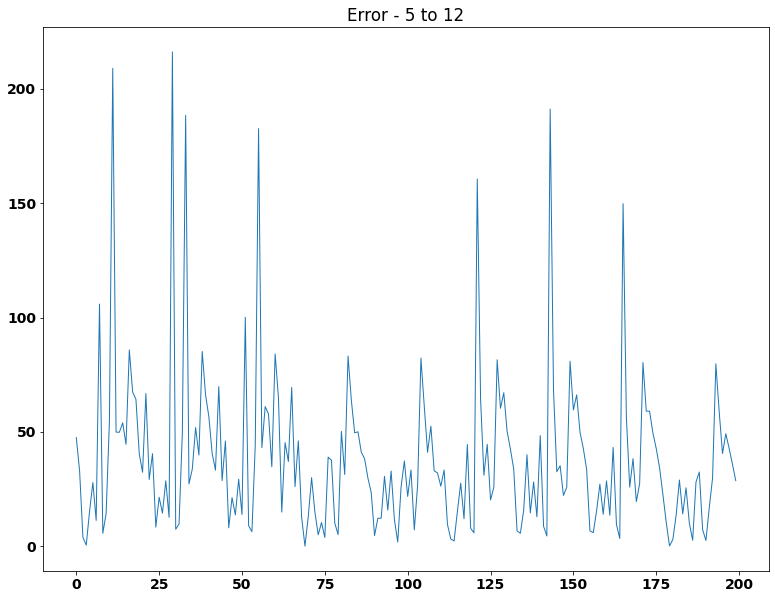

99% MAPE: 277.26879050361725
NODE 8 to 12 - TOTAL MAPE:  317.640778956198
NODE 8 to 12 - SECTION MAPE:  0.6712519294509793


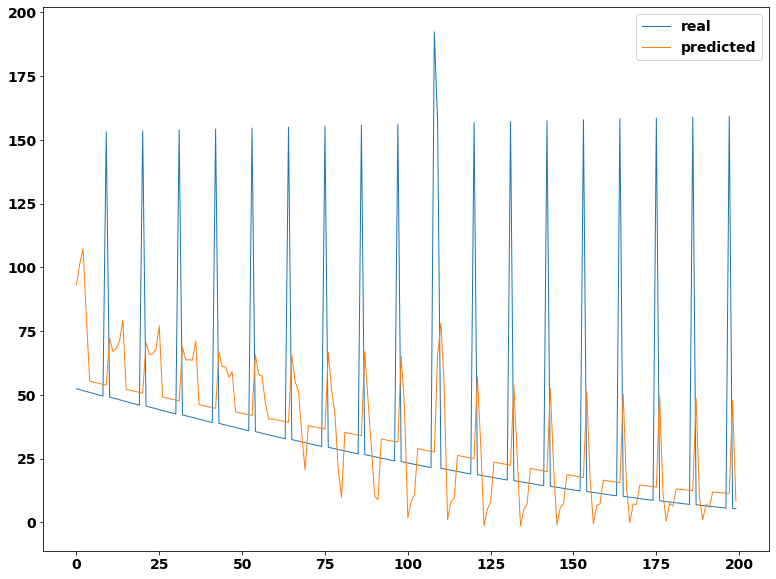

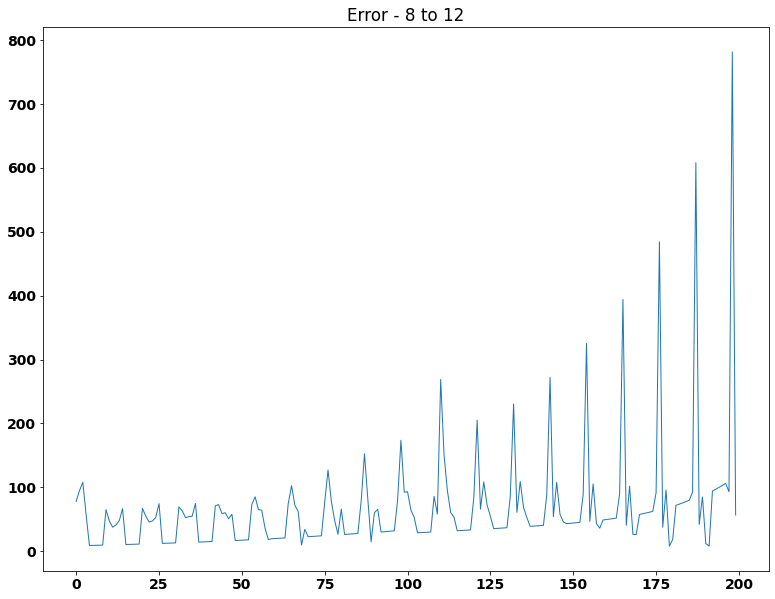

99% MAPE: 312.05438018360667
NODE 8 to 12 - TOTAL MAPE:  328.7121208162506
NODE 8 to 12 - SECTION MAPE:  0.68279846651182


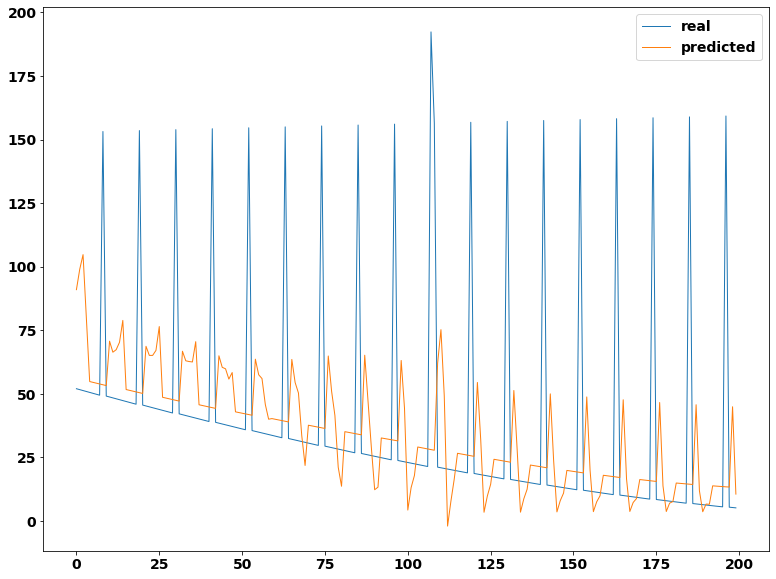

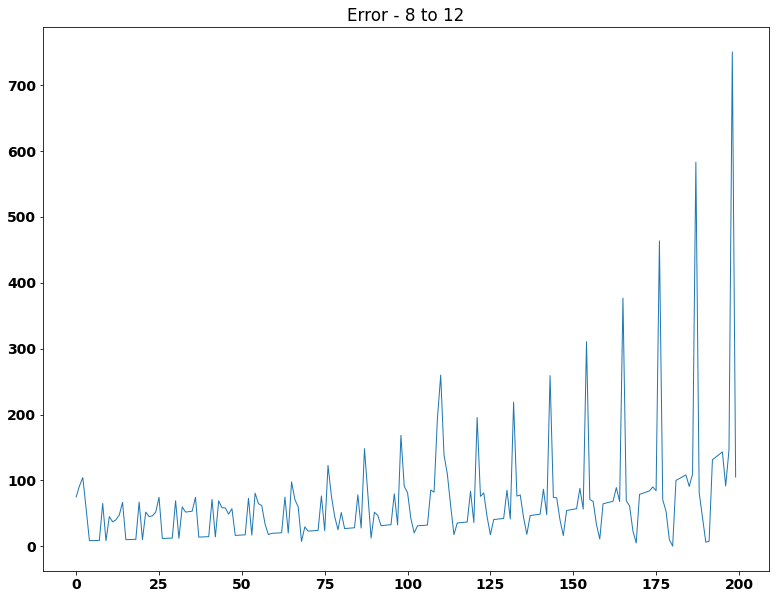

99% MAPE: 315.16807181204763
NODE 8 to 12 - TOTAL MAPE:  337.3180791858419
NODE 8 to 12 - SECTION MAPE:  0.6909413139630414


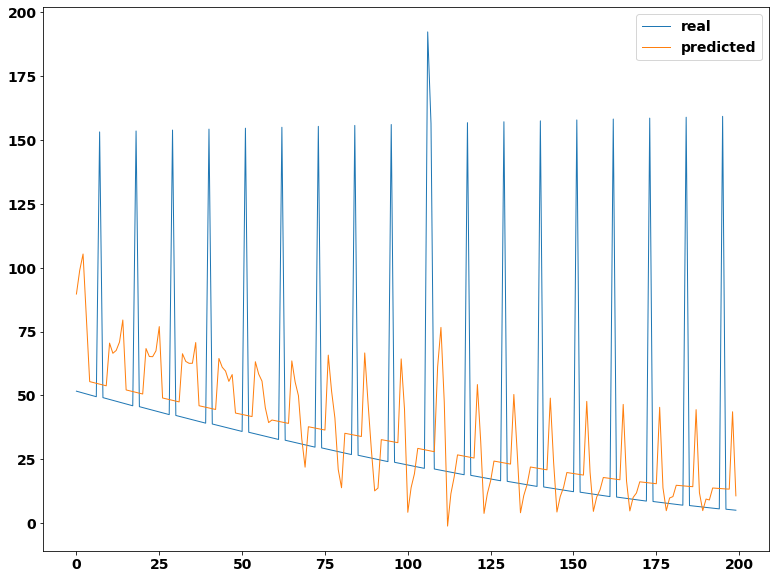

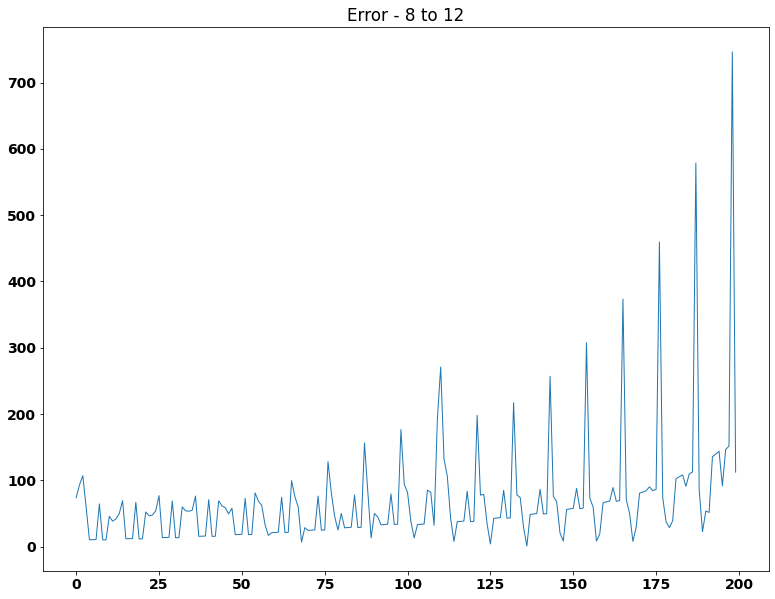

In [27]:
# analyze_all_experiments_singlestep('LSTM_5_in_1_out', (5900, 6100))
# analyze_all_experiments_singlestep('LSTM_CHUNK_5_in_1_out', (5900, 6100))
analyze_all_experiments_multistep('LSTM_1_CHUNK_5_in_3_out', 3, (50000, 50200))

